In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [28]:

####CLASSIFYING THE DATA AND REMOVING DUPLICATE TILESCAN ROWS


pddf=pd.read_csv('/Users/secchim/Documents/VWF_062_MS220418_IVMdepletion24h_metadata.csv')
pddf


##### WORKS
pddf.loc[pddf['NZslices']==1, 'Datatype']='snap'
pddf.loc[pddf['NZslices']>1, 'Datatype']='single_zstack'
pddf.loc[pddf['Tilerow']>1, 'Datatype']='tilescan'
pddf.loc[pddf['Tilecolumn'] >1, 'Datatype']='tilescan'
pddf.loc[pddf['Nframes']>1, 'Datatype']='movie'

pddf

#REMOVING THE TILESCAN PROCESSED FILES

df=pddf[pddf['Position_Name'].str.contains('padd')==False]
df=df[df['Position_Name'].str.contains('stich')==False]

df

#pddf.to_csv('/Users/secchim/Documents/VWF_043_MS211118_onstage_plt_depletion_metadata_edited.csv', index=False)

#df.to_csv('/Users/secchim/Documents/VWF_043_MS211118_onstage_plt_depletion_metadata_edited2.csv', index=False)

,Position_Name,Position_X,Position_Y,AcquisitionDate,AcquisitionTime,NChannel,Nframes,NZslices,Tilerow,Tilecolumn,Datatype
0,VWF_062_MS220419_M2_P4-LSM Plus Processing-01.czi,5692.5,45188.4,19/04/2022,12:40:15.021941Z,4,1,1,1,1,snap
1,VWF_062_MS220419_M2_P5-LSM Plus Processing-01.czi,5867.1,45458.8,19/04/2022,12:44:07.4493846Z,4,1,1,1,1,snap
2,VWF_062_MS220419_M2_P5_2-LSM Plus Processing-0...,5866.5,45458.8,19/04/2022,13:29:13.4278429Z,4,1,1,1,1,snap
3,VWF_062_MS220419_M2_P8-LSM Plus Processing-03.czi,6264.0,43738.5,19/04/2022,12:52:20.4159873Z,4,1,1,1,1,snap
4,VWF_062_MS220419_M2_P9-LSM Plus Processing-04.czi,6354.9,43642.5,19/04/2022,12:54:04.4940672Z,4,1,1,1,1,snap
...,...,...,...,...,...,...,...,...,...,...,...
100,VWF_062_MS220421_M2_P4_DP-LSM Plus Processing-...,-804.8,44071.0,21/04/2022,15:57:06.6724223Z,4,1,1,1,1,snap
101,VWF_062_MS220421_M2_P4_DP_postdepletion-LSM Pl...,-804.5,44070.9,21/04/2022,18:14:56.5959024Z,4,1,1,1,1,snap
102,VWF_062_MS220421_M2_P6-LSM Plus Processing-05.czi,-1141.2,44790.0,21/04/2022,16:02:09.6837367Z,4,1,1,1,1,snap
103,VWF_062_MS220421_M4_P2-LSM Plus Processing-06.czi,-2005.7,43421.3,21/04/2022,14:12:43.2693409Z,4,1,1,1,1,snap


<AxesSubplot:ylabel='Frequency'>

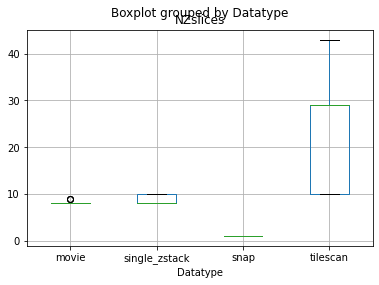

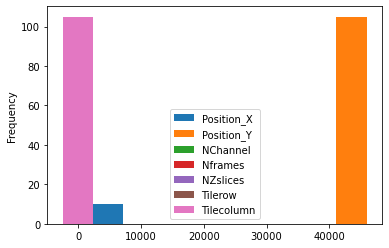

In [32]:
pddf.boxplot(column= 'NZslices', by= 'Datatype')
pddf.plot.hist(by='NZslices')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


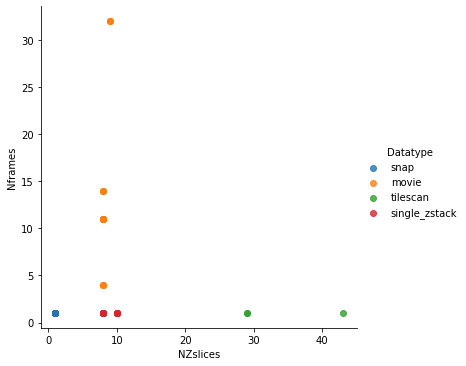

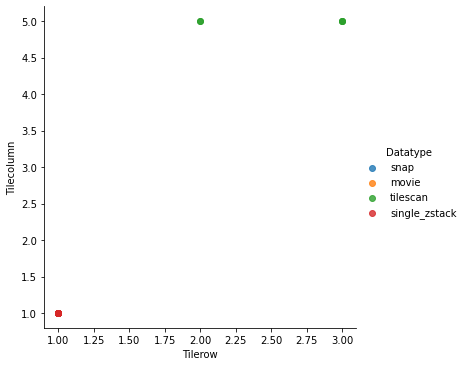

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

#https://kanoki.org/2020/08/30/matplotlib-scatter-plot-color-by-category-in-python/

sns.lmplot('NZslices','Nframes',data=pddf, hue='Datatype', fit_reg=False)

sns.lmplot('Tilerow','Tilecolumn',data=pddf, hue='Datatype', fit_reg=False)

In [19]:
#date_cols=["Imaging_Date", ''] #, parse_dates=date_cols
mice=pd.read_csv('/Volumes/LUIS1_MS/Experiments/IVM_mice_info.csv')
mice
mice['Imaging_Date']=mice['Imaging_Date'].str.replace(r'-','')
mice['Imaging_Date']=mice['Imaging_Date'].str.replace(r'2022','22')
mice['Imaging_Date']=mice['Imaging_Date'].str.replace(r'2021','21')

mice['FileID']= (mice['Experiment']+'_MS'+mice['Imaging_Date']+'_'+mice['Experiment mouse number'])
#PB STRING WON T BE EXACTLY THAT IN FILENAME
mice


#mice.to_csv('/Users/secchim/Documents/mice_fileID.csv', index=False)


,Experiment mouse number,Mouse ID,Genotype,D.O.B.,Age,Sex,Treatment,Time of treatment,timepoint_movies,Experiment,...,Imaging_Date,Strain,Comments,Platelet_count_sysmex x10^3,dilution 1 in,platelet_count,Time of bleeding,Number of DP,relative_time_of_bleeding,FileID
0,M1,113778-LL,Vwf Tg/+ Hoxb5Tg/+,31/10/2021,11w,F,plt_depletion,14:05:00,homeostasis+ after depletion,VWF_048,...,220119,Hoxb5_Vwf,NaN,19,5,95,15:15:00,2,01:10:00,VWF_048_MS220119_M1
1,M2,113817-R,Vwf Tg/Tg Hoxb5Tg/+ LepRCre WT IL1R1 het,01/11/2021,11w,F,homeostasis,na,homeostasis+ after depletion,VWF_048,...,220118,Hoxb5_ILVL,NaN,na,na,na,na,1,na,VWF_048_MS220118_M2
2,M2,113817-R,Vwf Tg/Tg Hoxb5Tg/+ LepRCre WT IL1R1 het,01/11/2021,11w,F,plt_depletion,12:12:00,homeostasis+ after depletion,VWF_048,...,220120,Hoxb5_ILVL,NaN,2,5,10,16:30:00,NaN,04:18:00,VWF_048_MS220120_M2
3,M3,113819-RL,Vwf Tg/+ Hoxb5Tg/+ LepRCre WT IL1R1 het,01/11/2021,11w,F,homeostasis,na,homeostasis+ after depletion,VWF_048,...,220118,Hoxb5_ILVL,NaN,na,na,na,na,1,na,VWF_048_MS220118_M3
4,M3,113819-RL,Vwf Tg/+ Hoxb5Tg/+ LepRCre WT IL1R1 het,01/11/2021,11w,F,plt_depletion,17:30:00,homeostasis+ after depletion,VWF_048,...,220118,Hoxb5_ILVL,NaN,13,5,65,19:30:00,1,02:00:00,VWF_048_MS220118_M3
5,M2,109281-RRL,Vwf Tg/+ Hoxb5Tg/+,08/10/2021,8.8w,F,plt_depletion,09:17:00,3h,VWF_045,...,211208,Hoxb5_Vwf,NaN,2,5,10,17:25:00,0,08:08:00,VWF_045_MS211208_M2
6,M1,109278-RRL,Vwf Tg/+ Hoxb5Tg/+,08/10/2021,8.8w,M,plt_depletion,09:00:00,24h,VWF_045,...,211209,Hoxb5_Vwf,died at 10:30_headpiece detached after,0,5,0,11:15:00,NaN,02:15:00,VWF_045_MS211209_M1
7,M1,104553-L,Vwf Tg/+ Hoxb5Tg/+ IL1R het LeprCre WT,31/08/2021,11.1,M,plt_depletion,13:19:00,NaN,VWF_043,...,211118,Hoxb5_ILVL,NaN,36,1,36,17:30:00,NaN,04:11:00,VWF_043_MS211118_M1
8,M2,104769-RL,Vwf Tg/+ Hoxb5Tg/+,06/09/2021,10.3,M,homeostasis,na,NaN,VWF_043,...,211119,Hoxb5_Vwf,"injected before anaesthesia, headpiece detached",na,na,na,na,0,na,VWF_043_MS211119_M2
9,M3,109464-RL,Vwf Tg/+ Hoxb5Tg/+ IL1R het LeprCre WT,04/10/2021,7.3,M,homeostasis,na,NaN,VWF_043,...,211125,Hoxb5_ILVL,NaN,na,na,na,na,0,na,VWF_043_MS211125_M3


In [31]:

#x=(df['Position_Name'][0:16])
#df['FileID']=x
df['FileID']=df['Position_Name'].str[0:19]
df

#df.merge(mice, how='left', left_on='dfFileID', right_on=['FileID'] )
merged_df=pd.merge(mice, df[:], on = 'FileID')
merged_df

#merged_df.to_csv('/Users/secchim/Documents/merged_metadata_and_mice.csv', index=False)

In [37]:
merged_df['BatchID']=merged_df['Experiment']+'_'+merged_df['Experiment mouse number']
merged_df.to_csv('/Users/secchim/Documents/merged_metadata_and_mice.csv', index=False)
merged_df

,Experiment mouse number,Mouse ID,Genotype,D.O.B.,Age,Sex,Treatment,Time of treatment,timepoint_movies,Experiment,...,Position_Y,AcquisitionDate,AcquisitionTime,NChannel,Nframes,NZslices,Tilerow,Tilecolumn,Datatype,BatchID
0,M1,128118-R,Vwf Tg/+ Hoxb5Tg/+,03/02/2022,10.2,M,24h_depletion,11:30:00,NaN,VWF_062,...,43579.2,20/04/2022,10:49:51.9221983Z,4,1,1,1,1,snap,VWF_062_M1
1,M1,128118-R,Vwf Tg/+ Hoxb5Tg/+,03/02/2022,10.2,M,24h_depletion,11:30:00,NaN,VWF_062,...,43510.9,20/04/2022,12:07:45.5392363Z,4,1,1,1,1,snap,VWF_062_M1
2,M1,128118-R,Vwf Tg/+ Hoxb5Tg/+,03/02/2022,10.2,M,24h_depletion,11:30:00,NaN,VWF_062,...,44395.8,20/04/2022,11:45:08.1857928Z,4,1,1,1,1,snap,VWF_062_M1
3,M1,128118-R,Vwf Tg/+ Hoxb5Tg/+,03/02/2022,10.2,M,24h_depletion,11:30:00,NaN,VWF_062,...,44399.7,20/04/2022,12:02:44.5401837Z,4,1,1,1,1,snap,VWF_062_M1
4,M1,128118-R,Vwf Tg/+ Hoxb5Tg/+,03/02/2022,10.2,M,24h_depletion,11:30:00,NaN,VWF_062,...,43532.3,20/04/2022,11:14:58.6078059Z,4,1,1,1,1,snap,VWF_062_M1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,M5,128123-R,Vwf Tg/Tg Hoxb5Tg/+,03/02/2022,10.2,M,24h_depletion,10:30:00,NaN,VWF_062,...,45470.3,21/04/2022,09:37:43.7935426Z,4,1,1,1,1,snap,VWF_062_M5
98,M5,128123-R,Vwf Tg/Tg Hoxb5Tg/+,03/02/2022,10.2,M,24h_depletion,10:30:00,NaN,VWF_062,...,45406.5,21/04/2022,10:10:45.7352893Z,4,1,1,1,1,snap,VWF_062_M5
99,M5,128123-R,Vwf Tg/Tg Hoxb5Tg/+,03/02/2022,10.2,M,24h_depletion,10:30:00,NaN,VWF_062,...,44994.8,21/04/2022,10:13:54.7361472Z,4,1,1,1,1,snap,VWF_062_M5
100,M5,128123-R,Vwf Tg/Tg Hoxb5Tg/+,03/02/2022,10.2,M,24h_depletion,10:30:00,NaN,VWF_062,...,44916.4,21/04/2022,10:20:04.0638908Z,4,1,1,1,1,snap,VWF_062_M5
